<a href="https://colab.research.google.com/github/Monsoon94/ADP/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 분류

In [ ]:
#저장 잘 되는지 확인

# 결정트리(Desicion Tree)

## 주요 파라미터

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 분류용
clf = DecisionTreeClassifier(
    criterion="gini",        # 분할 기준: "gini"(기본), "entropy", "log_loss"
    splitter="best",         # 분할 방식: "best"(기본), "random"
    max_depth=None,          # 트리 최대 깊이 (None = 제한 없음)
    min_samples_split=2,     # 내부 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf=1,      # 리프 노드가 가져야 하는 최소 샘플 수
    min_weight_fraction_leaf=0.0, # 가중치 기준 리프 최소 샘플 비율
    max_features=None,       # 분할 시 고려할 최대 피처 수
    random_state=42,         # 결과 재현성을 위한 난수 고정
    max_leaf_nodes=None,     # 리프 노드 최대 개수
    min_impurity_decrease=0.0, # 분할을 위한 최소 불순도 감소량
    class_weight=None        # 클래스 가중치: {0:1, 1:5} 또는 "balanced"
)

Train Accuracy: 0.9523809523809523
Test Accuracy: 1.0


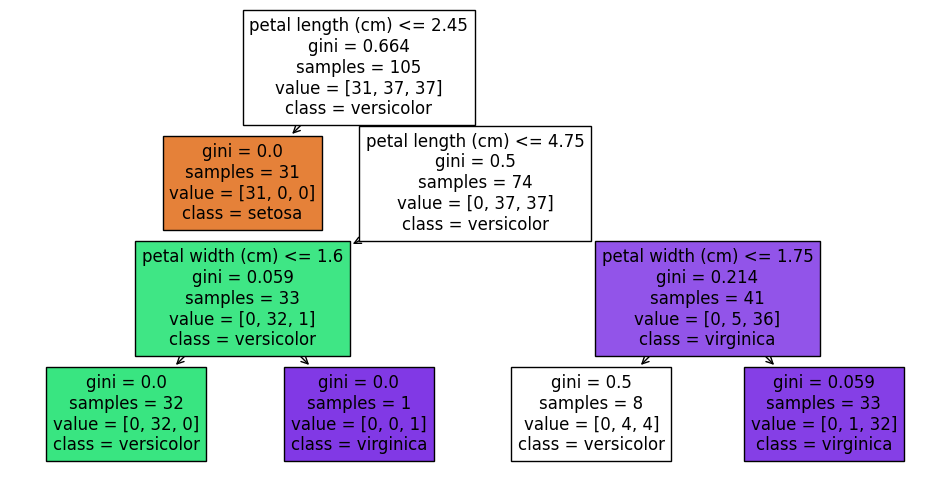

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 로드
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 결정트리 분류기
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=3,
    random_state=42
)
clf.fit(X_train, y_train)

# 정확도
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

# 트리 시각화
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()

## 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2, 3, 5, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.9428571428571428


## 특성 중요도

In [ ]:
import pandas as pd

feature_importances = clf.feature_importances_
print(pd.DataFrame({
    "Feature": load_iris().feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False))

             Feature  Importance
2  petal length (cm)    0.925108
3   petal width (cm)    0.074892
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


# 앙상블(Ensemble)

# Bagging
📘 1️⃣ 개념 요약

Bagging (Bootstrap Aggregating)

여러 개의 모델을 독립적으로 학습시켜 예측 결과를 평균(회귀) 또는 투표(분류)로 결합하는 방법.

즉, 데이터를 다양하게 변형하여 여러 모델을 학습 → 예측을 종합 → 안정적 결과 도출.

📊 2️⃣ 핵심 아이디어

모델 하나하나가 “불안정(unstable)”하면, 데이터 샘플이 조금만 바뀌어도 예측이 크게 달라짐

여러 개의 모델을 무작위 데이터 샘플로 각각 학습시켜, 개별 예측을 평균 또는 다수결로 합침

이렇게 하면 오류가 상쇄되고, 모델 전체의 분산(variance) 이 줄어듦

⚙️ 3️⃣ 작동 원리

🔹 Step 1. Bootstrap Sampling (부트스트랩 샘플링)

전체 데이터에서 중복 허용으로 n개의 샘플을 랜덤하게 추출

이 과정을 여러 번 반복해 여러 개의 데이터셋 생성

🔹 Step 2. 개별 모델 학습
각 부트스트랩 샘플로 동일한 모델(예: DecisionTree)을 학습

즉, 서로 다른 데이터를 본 여러 “약한 학습기(weak learners)” 생성

🔹 Step 3. Aggregation (결합)

분류 → 다수결 투표(voting)

회귀 → 평균(averaging)


## 주요 파라미터

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# base model 선택
base_model = DecisionTreeClassifier(
        max_depth=None,
        random_state=0)

# bagging classifier
clf = BaggingClassifier(
    estimator= base_model,     # base_estimator는 deprecated → estimator 사용(1.2 버전 이후)
    n_estimators=100,          # 개별 모델 수
    max_samples=1.0,           # 부트스트랩 샘플 크기 (비율/정수)
    max_features=1.0,          # 각 추정기에 사용할 피처 수 (비율/정수) → Feature bagging
    bootstrap=True,            # 샘플 부트스트랩
    bootstrap_features=False,  # 피처 부트스트랩
    oob_score=True,            # OOB(out-of-bag) 검증 사용
    n_jobs=-1,                 # 병렬 처리
    random_state=42,           # 재현성
    verbose=0,                 # 로그
    warm_start=False           # True면 추후 더 많은 추정기를 이어붙여 학습 가능
)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

clf.fit(X_tr, y_tr)
pred = clf.predict(X_te)
print("Accuracy:", accuracy_score(y_te, pred))

if clf.oob_score:
    print("OOB Score:", clf.oob_score_)  # 훈련 중 내부적으로 계산된 일반화 성능 추정치


Accuracy: 0.9333333333333333
OOB Score: 0.9523809523809523


# Voting Classifier

## 주요 파라미터

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[        # (이름, 모델) 튜플 리스트
        ("lr",  log_reg_model),
        ("svc", svc_model),
        ("tree",tree_model),
    ],
    voting="hard",      # "hard": 다수결, "soft": 확률 평균
    weights=None,       # 각 모델의 가중치 (리스트). None이면 동일 가중. 3개 모델이면 [1, 2, 1] 표현
    n_jobs=None,        # 병렬 추론(일부 추정기만), 학습은 각 추정기 내부 규칙 따름
    flatten_transform=True,  # transform() 출력 모양 제어
    verbose=False
)

# 주의! voting="soft"를 쓰려면 모든 구성 모델이 predict_proba 를 지원해야 합니다.
#(SVC는 probability=True 또는 CalibratedClassifierCV 필요

사용 예제

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# 데이터 준비
X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

# base models
lr   = LogisticRegression(max_iter=500, random_state=42)
svc  = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)  # soft 위해 probability=True
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Hard voting
hard = VotingClassifier(estimators=[("lr", lr), ("svc", svc), ("tree", tree)], voting="hard")
hard.fit(X_tr, y_tr)
print("Hard Voting Acc:", accuracy_score(y_te, hard.predict(X_te)))

# Soft voting
soft = VotingClassifier(estimators=[("lr", lr), ("svc", svc), ("tree", tree)], voting="soft")
soft.fit(X_tr, y_tr)
print("Soft Voting Acc:", accuracy_score(y_te, soft.predict(X_te)))

Hard Voting Acc: 0.9555555555555556
Soft Voting Acc: 0.9333333333333333


파이프라인을 통한 구축

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr   = make_pipeline(StandardScaler(with_mean=False),
                     LogisticRegression(max_iter=500, random_state=42))
svc  = make_pipeline(StandardScaler(),
                     SVC(probability=True, random_state=42))
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

vc = VotingClassifier(
    estimators=[("lr", lr), ("svc", svc), ("tree", tree)],
    voting="soft",            # 확률 평균
    weights=[1, 2, 1]         # 성능 좋은 모델 가중 ↑
).fit(X_tr, y_tr)

#
print("Soft Voting Acc:", accuracy_score(y_te, vc.predict(X_te)))

Soft Voting Acc: 0.9555555555555556


하이퍼 파라미터 + 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# voting models
lr   = LogisticRegression(max_iter=500, random_state=42)
svc  = SVC(probability=True, random_state=42)
tree = DecisionTreeClassifier(random_state=42)

vc = VotingClassifier(estimators=[("lr", lr), ("svc", svc), ("tree", tree)], voting="soft")

# 파라미터 이름은 "<별칭>__<하이퍼파라미터>" 형식. (estimators=[("lr", ...), ...] 에서 정한 별칭 사용)
param_grid = {
    "svc__C": [0.5, 1.0, 2.0],
    "svc__gamma": ["scale", 0.1, 0.01],
    "lr__C": [0.5, 1.0, 2.0],
    "tree__max_depth": [3, 5, None],
    "weights": [[1,1,1], [1,2,1], [2,2,1]]
}

grid = GridSearchCV(vc, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_tr, y_tr)
print("Best params:", grid.best_params_)
print("CV best score:", grid.best_score_)
best_model = grid.best_estimator_

Best params: {'lr__C': 0.5, 'svc__C': 0.5, 'svc__gamma': 'scale', 'tree__max_depth': 3, 'weights': [1, 1, 1]}
CV best score: 0.9619047619047618


# Stacking classifier

## 주요 파라미터

In [ ]:
from sklearn.ensemble import StackingClassifier

sc = StackingClassifier(
    estimators=[ ... ],          # [(이름, 모델), ...]
    final_estimator=None,        # 기본: LogisticRegression
    cv=5,                        # OOF 분할 수 (int, CV 객체 가능)
    stack_method='auto',         # 'auto'|'predict_proba'|'decision_function'|'predict'
    passthrough=False,           # True면 원본 X를 메타모델 입력에 함께 전달
    n_jobs=None,                 # 일부 추정기 병렬화
    verbose=0
)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# 데이터 준비
X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

# 베이스 모델: 서로 성격이 다른 모델 조합 권장
lr   = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=500, random_state=42))
svc  = make_pipeline(StandardScaler(), SVC(probability=True, kernel="rbf", random_state=42))
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Stacking Classifier
stack = StackingClassifier(
    estimators=[("lr", lr), ("svc", svc), ("tree", tree)],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5,                     # OOF 생성
    stack_method="predict_proba",
    passthrough=False,
    n_jobs=-1
).fit(X_tr, y_tr)

print("Stacking Accuracy:", accuracy_score(y_te, stack.predict(X_te)))


Stacking Accuracy: 0.9333333333333333


passthrough = True >> 메타 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

stack_pt = StackingClassifier(
    estimators=[("lr", lr), ("svc", svc), ("tree", tree)],
    final_estimator=RandomForestClassifier(
        n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
    ),
    cv=5,
    stack_method="predict_proba",
    passthrough=True,
    n_jobs=-1
).fit(X_tr, y_tr)

print("Stacking Accuracy:", accuracy_score(y_te, stack_pt.predict(X_te)))

Stacking Accuracy: 0.9333333333333333


하이퍼 파라미터 + 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

base_lr   = LogisticRegression(max_iter=500, random_state=42)
base_svc  = SVC(probability=True, random_state=42)
base_tree = DecisionTreeClassifier(random_state=42)

stack = StackingClassifier(
    estimators=[("lr", base_lr), ("svc", base_svc), ("tree", base_tree)],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5, stack_method="predict_proba"
)

param_grid = {
    "lr__C": [0.5, 1.0, 2.0],
    "svc__C": [0.5, 1.0, 2.0],
    "svc__gamma": ["scale", 0.1],
    "tree__max_depth": [3, 5, None],
    "final_estimator__C": [0.5, 1.0, 2.0],
    "passthrough": [False, True]
}

grid = GridSearchCV(stack, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_tr, y_tr)
print("Best params:", grid.best_params_)
print("CV best score:", grid.best_score_)
best_stack = grid.best_estimator_


Best params: {'final_estimator__C': 2.0, 'lr__C': 1.0, 'passthrough': True, 'svc__C': 2.0, 'svc__gamma': 'scale', 'tree__max_depth': 5}
CV best score: 0.9714285714285713
